# Projet Kaggle 2

## Etape 1: Chargement et Visualisation des données

In [1]:
# Bibliotheques utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler , RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import (confusion_matrix, classification_report, 
                             roc_auc_score, roc_curve, accuracy_score,
                             precision_score, recall_score, f1_score)
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
# Modèles classiques
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
import pickle
import joblib
import time
import xgboost as xgb

In [2]:
#Chargement et affichage des données 
data_credit2=pd.read_csv('/Users/youss/Documents/Projet Kaggle/creditcard2.csv')
data_credit2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Verification de la base de données
data_credit2.info()
data_credit2.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
#Duplicate
data_credit2.duplicated().sum()

np.int64(1081)

In [5]:
data_credit2.drop_duplicates(inplace=True)
data_credit2.duplicated().sum()

np.int64(0)

## Etape 2: Analyse exploratoire

In [71]:
data_credit2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [6]:
# Variable Class
# Compter le nombre de transactions frauduleuses et normales
counts = data_credit2['Class'].value_counts()

print(f"Nombre de transactions normales (0) : {counts[0]}")
print(f"Nombre de transactions frauduleuses (1) : {counts[1]}")

fraude_pourcentage = data_credit2['Class'].value_counts(normalize=True) * 100
print(fraude_pourcentage)

# Calculer le ratio
ratio = counts[0] / counts[1]
print(f"Ratio : 1 fraude pour {ratio:.0f} transactions normales")

Nombre de transactions normales (0) : 283253
Nombre de transactions frauduleuses (1) : 473
Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64
Ratio : 1 fraude pour 599 transactions normales


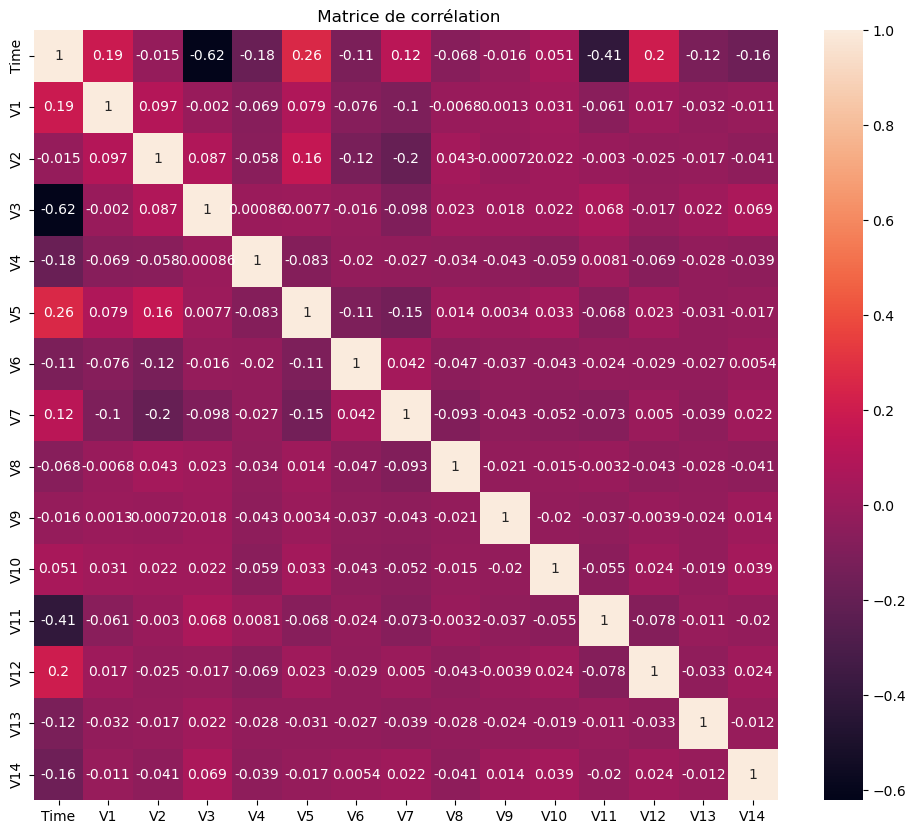

In [7]:
matrix =data_credit2.corr()
matrix1= matrix.iloc[:,:15].corr()
plt.figure(figsize=(12, 10))
sb.heatmap(matrix1,annot=True)

plt.title(" Matrice de corrélation")
plt.show()

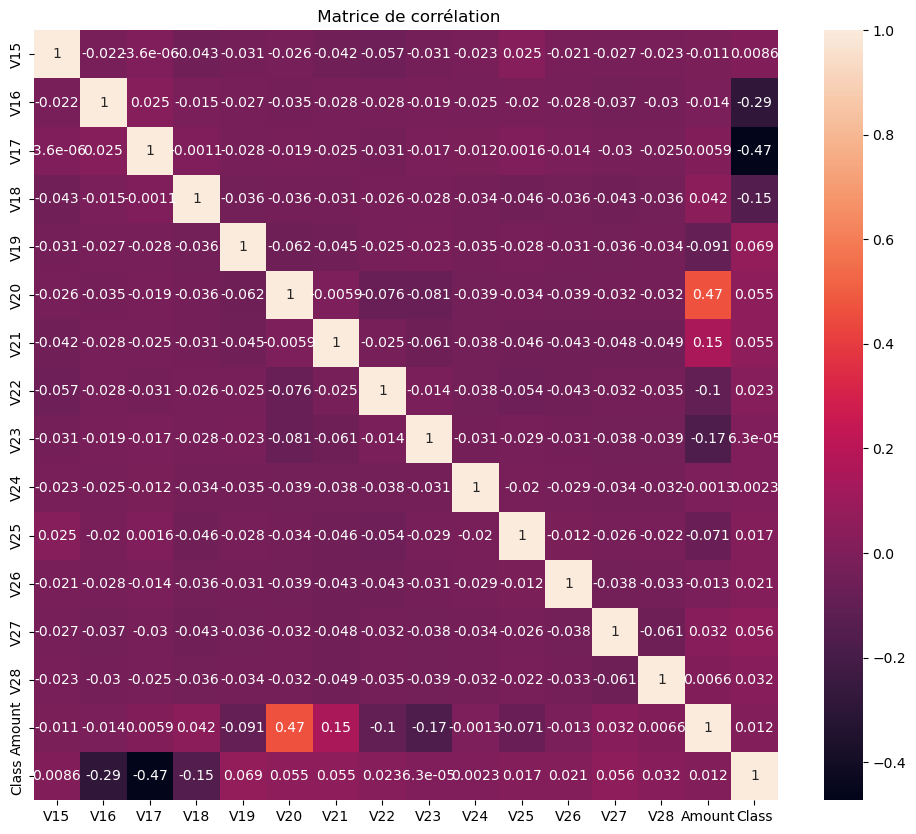

In [8]:
matrix2= matrix.iloc[:,15:].corr()
plt.figure(figsize=(12, 10))
sb.heatmap(matrix2,annot=True)

plt.title(" Matrice de corrélation")
plt.show()

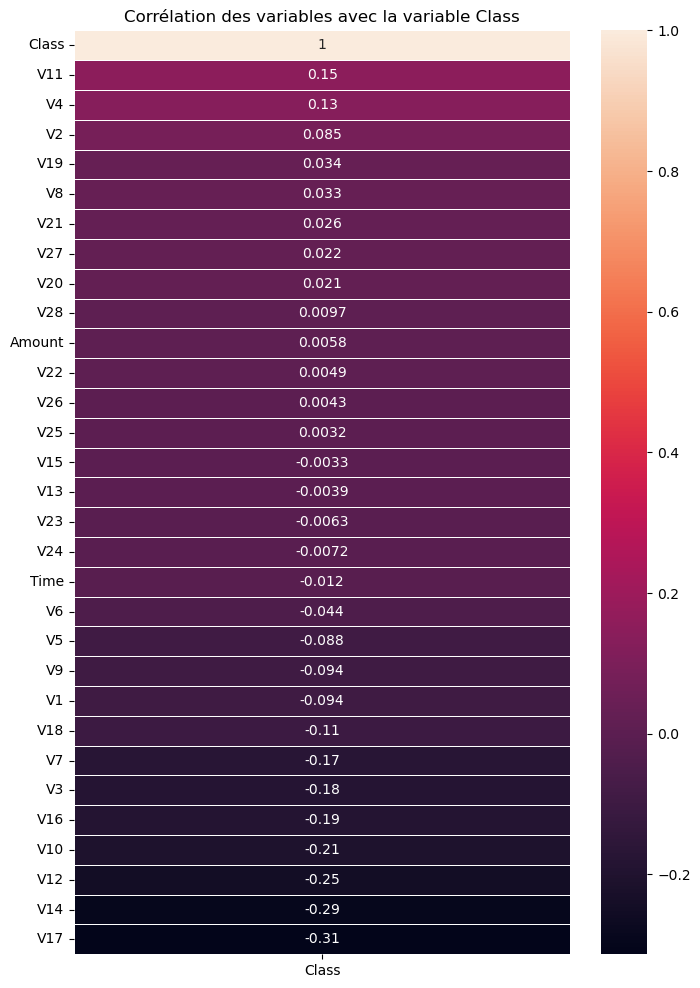

In [9]:
# Vecteur de correlation avec Class
correlation_vector = data_credit2.corr()[['Class']].sort_values(by='Class', ascending=False)

plt.figure(figsize=(8, 12)) # Plus haut que large pour une colonne
sb.heatmap(correlation_vector, annot=True,linewidths=0.5)

plt.title("Corrélation des variables avec la variable Class")
plt.show()

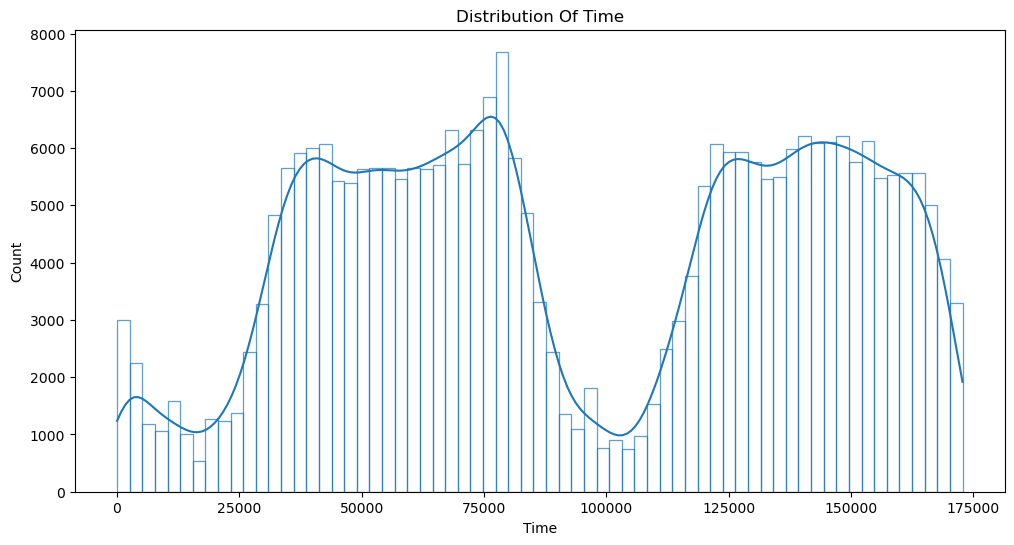

In [10]:
plt.figure(figsize=(12,6))
sb.histplot(data=data_credit2,x='Time', kde=True ,fill=False ,alpha=0.7)
plt.title("Distribution Of Time")
plt.show()

In [11]:
Q1 = data_credit2['Time'].quantile(0.25)
Q3 = data_credit2['Time'].quantile(0.75)
IQR = Q3-Q1

UB = Q3+1.5*IQR
LB = Q1-1.5*IQR

outliers = data_credit2[(data_credit2['Time']<LB)|(data_credit2['Time']>LB)]
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
data_credit2['Amount'].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

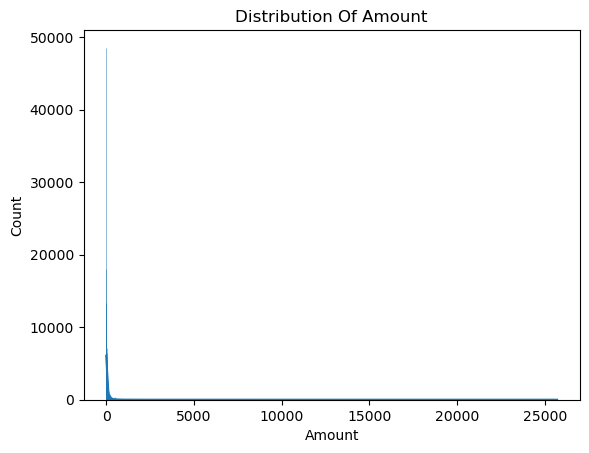

In [13]:
sb.histplot(data=data_credit2,x='Amount', kde=True ,fill=False ,alpha=0.7)
plt.title("Distribution Of Amount")
plt.show()

In [14]:
Q1 = data_credit2['Amount'].quantile(0.25)
Q3 = data_credit2['Amount'].quantile(0.75)
IQR = Q3-Q1

UB = Q3+1.5*IQR
LB = Q1-1.5*IQR

outliers = data_credit2[(data_credit2['Amount']<LB)|(data_credit2['Amount']>LB)]
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


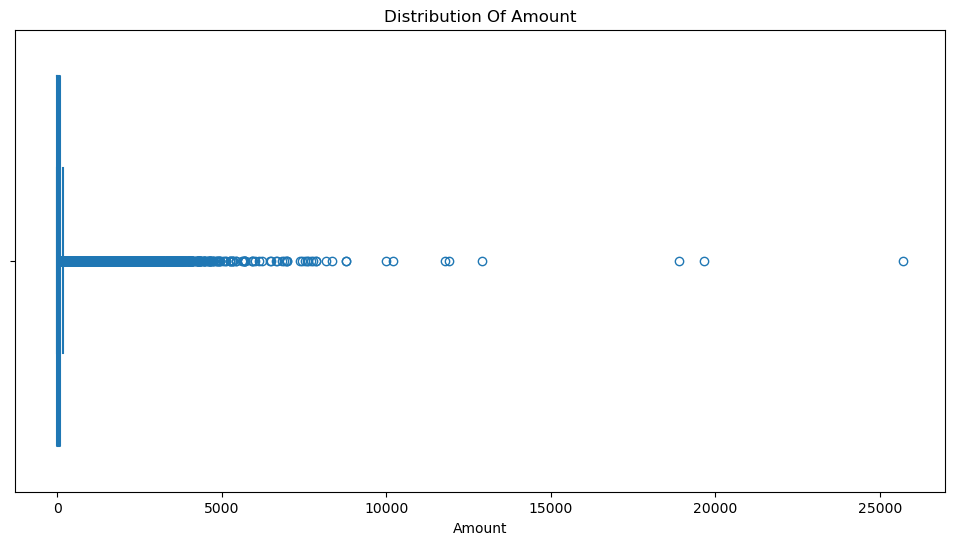

In [15]:
plt.figure(figsize=(12,6))
sb.boxplot(data=data_credit2,x='Amount',fill=False)
plt.title("Distribution Of Amount")
plt.show()

In [16]:
data_credit2["Class"].value_counts().reset_index()

,Class,count
0,0,283253
1,1,473


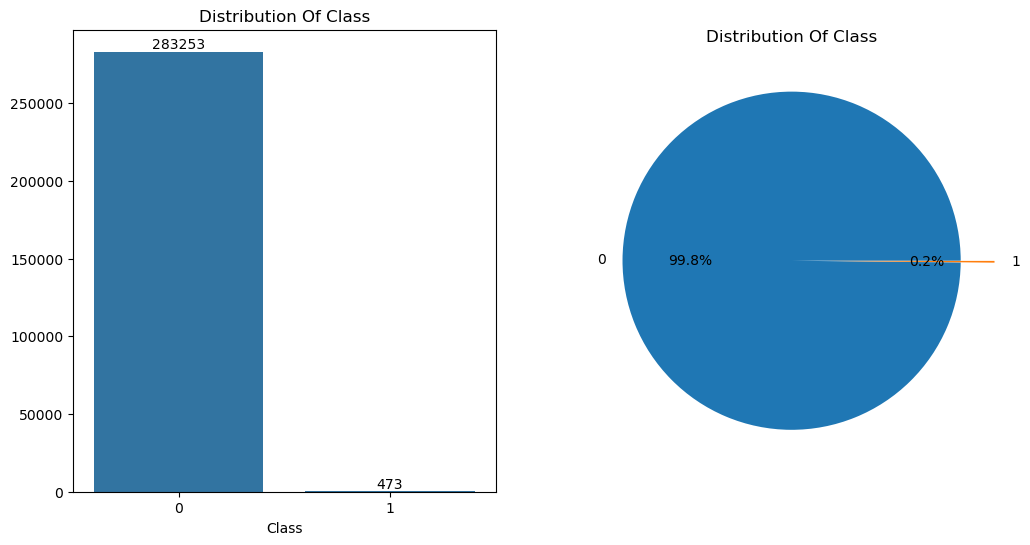

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
ax = sb.barplot(x=data_credit2['Class'].value_counts().index,y=data_credit2['Class'].value_counts().values)
ax.bar_label(ax.containers[0])
plt.title("Distribution Of Class")

plt.subplot(1,2,2)
plt.pie(x=data_credit2['Class'].value_counts(),labels=data_credit2['Class'].value_counts().index,explode=[0,0.2],autopct="%1.1f%%")
plt.title("Distribution Of Class")
plt.show()

## Etape 3: Preparation des données

In [18]:
SC = RobustScaler()

data_credit2['Amount'] = SC.fit_transform(data_credit2[['Amount']])
data_credit2['Time'] = SC.fit_transform(data_credit2[['Time']])

In [19]:
# Choix de garder toutes les features 
X = data_credit2.drop('Class', axis=1)
y = data_credit2['Class'] 

In [20]:
# Découpage des données
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,      
    random_state=42,    
    stratify=y
)

In [21]:
# Vérification des données
print("Vérification des données:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Distribution train: {y_train.value_counts().to_dict()}")
print(f"Distribution test: {y_test.value_counts().to_dict()}")

Vérification des données:
X_train shape: (226980, 30)
X_test shape: (56746, 30)
Distribution train: {0: 226602, 1: 378}
Distribution test: {0: 56651, 1: 95}


In [22]:
# Standardisation de l'Amount pour qu'il soit sur la même échelle que les V_n
scaler = StandardScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

In [23]:
#Smote
Smote = SMOTE(random_state=42)

X_train,y_train = Smote.fit_resample(X_train,y_train)
print(f"{X_train.shape}\n{y_train.shape}")

(453204, 30)
(453204,)


## Etape 4: Regression logistique 

### Modèle

In [24]:
# Dictionnaire pour stocker les résultats (utile pour comparer plusieurs modèles plus tard)
results = {}
# Regression logistique
start = time.time()
model_LR = LogisticRegression(max_iter=500,random_state=42,class_weight='balanced')
# Entrainement
model_LR.fit(X_train, y_train)
train_time = time.time() - start
# Stocker le modèle et le temps d'entraînement
results['Logistic Regression'] = {
    'model': model_LR,
    'train_time': train_time
}
print(f" Terminé en {results['Logistic Regression']['train_time']:.2f}s")

 Terminé en 1.37s


In [25]:
# PRÉDICTIONS
y_pred_LR = model_LR.predict(X_test)
y_proba_LR = model_LR.predict_proba(X_test)[:, 1] 

### Evaluation 


Vrais Négatifs (TN)  : 55169 (Normal prédit Normal)
Faux Positifs (FP)   :  1482 (Normal prédit Fraude) 
Faux Négatifs (FN)   :    12 (Fraude prédit Normal) 
Vrais Positifs (TP)  :    83 (Fraude prédit Fraude)


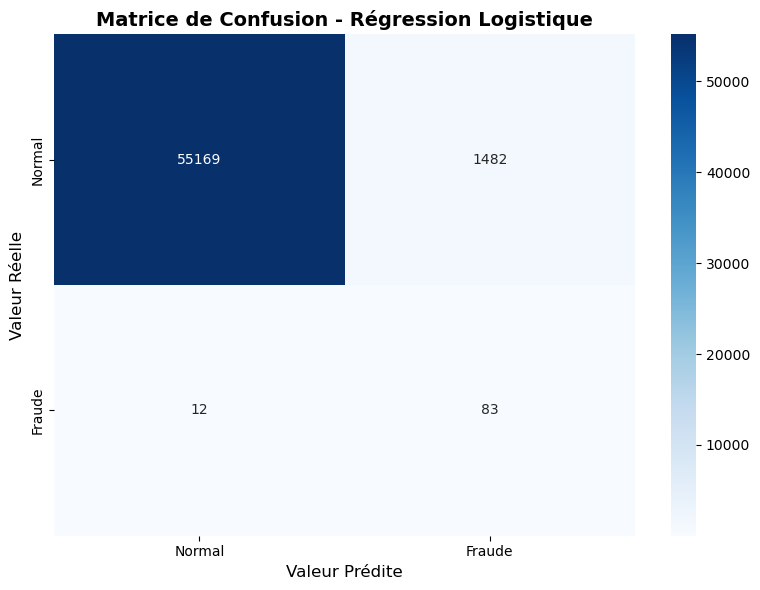

 Métriques calculées à partir de la matrice:
   Accuracy  = (TP + TN) / Total    = 0.9737
   Precision = TP / (TP + FP)       = 0.9982
   Recall    = TP / (TP + FN)       = 0.9737
   F1-Score  = 2×(P×R)/(P+R)        = 0.9852


In [26]:
#ÉVALUATION 1 : MATRICE DE CONFUSION
cm = confusion_matrix(y_test,y_pred_LR)

# Affichage des valeurs
print(f"\nVrais Négatifs (TN)  : {cm[0,0]:>5} (Normal prédit Normal)")
print(f"Faux Positifs (FP)   : {cm[0,1]:>5} (Normal prédit Fraude) ")
print(f"Faux Négatifs (FN)   : {cm[1,0]:>5} (Fraude prédit Normal) ")
print(f"Vrais Positifs (TP)  : {cm[1,1]:>5} (Fraude prédit Fraude)")

# Visualisation
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Normal', 'Fraude'],
            yticklabels=['Normal', 'Fraude'])
plt.title('Matrice de Confusion - Régression Logistique', fontsize=14, fontweight='bold')
plt.ylabel('Valeur Réelle', fontsize=12)
plt.xlabel('Valeur Prédite', fontsize=12)
plt.tight_layout()
plt.show()
#Calcul des metriques
accuracy = accuracy_score(y_test, y_pred_LR)
precision = precision_score(y_test, y_pred_LR, average='weighted')  
recall = recall_score(y_test, y_pred_LR, average='weighted')
f1 = f1_score(y_test, y_pred_LR, average='weighted')

# Stocker les métriques dans le dictionnaire
results['Logistic Regression']['accuracy'] = accuracy
results['Logistic Regression']['precision'] = precision
results['Logistic Regression']['recall'] = recall
results['Logistic Regression']['f1'] = f1

print(f" Métriques calculées à partir de la matrice:")
print(f"   Accuracy  = (TP + TN) / Total    = {accuracy:.4f}")
print(f"   Precision = TP / (TP + FP)       = {precision:.4f}")
print(f"   Recall    = TP / (TP + FN)       = {recall:.4f}")
print(f"   F1-Score  = 2×(P×R)/(P+R)        = {f1:.4f}")

 AUC-ROC Score: 0.9619


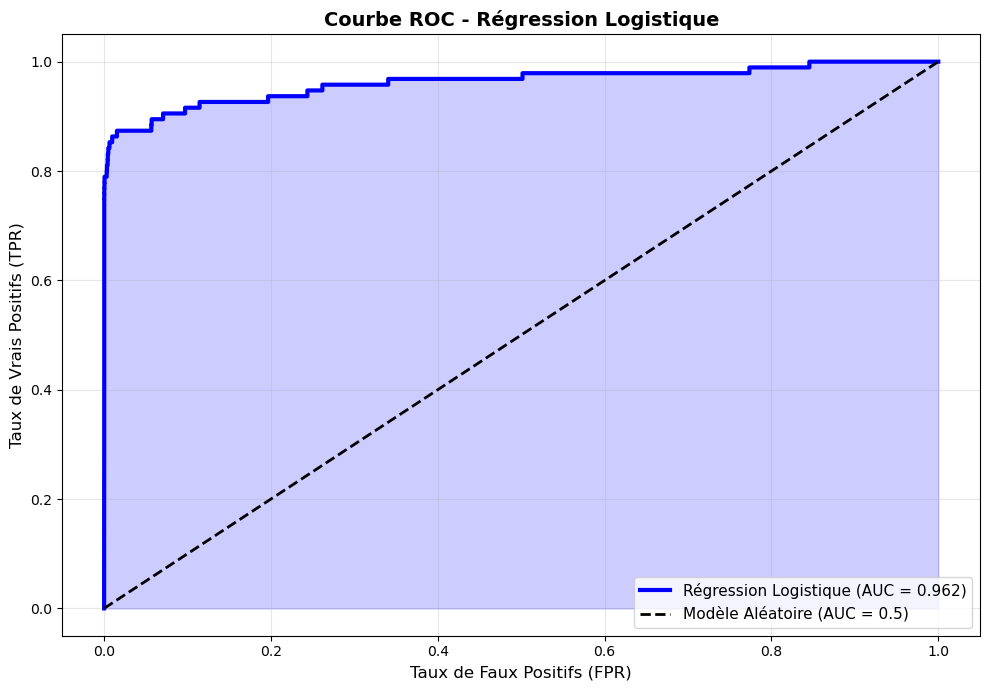

In [27]:
# ÉVALUATION 2 : AUC-ROC

# Calcul de l'AUC
auc_score = roc_auc_score(y_test, y_proba_LR)

# Stocker l'AUC dans le dictionnaire
results['Logistic Regression']['auc'] = auc_score

print(f" AUC-ROC Score: {auc_score:.4f}")

# Interprétation
if auc_score >= 0.9:
    interpretation = "Excellent modèle ! "
elif auc_score >= 0.8:
    interpretation = "Très bon modèle "
elif auc_score >= 0.7:
    interpretation = "Bon modèle "
elif auc_score >= 0.6:
    interpretation = "Modèle acceptable "
else:
    interpretation = "Modèle faible "

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_LR)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, linewidth=3, label=f'Régression Logistique (AUC = {auc_score:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Modèle Aléatoire (AUC = 0.5)')
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')

plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC - Régression Logistique', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

\ Résultats de la Validation Croisée (5-Fold):

   Accuracy:
      Scores par fold: ['0.9479', '0.9482', '0.9483', '0.9477', '0.9468']
      Moyenne: 0.9478 ± 0.0005

   Precision:
      Scores par fold: ['0.9734', '0.9729', '0.9738', '0.9737', '0.9722']
      Moyenne: 0.9732 ± 0.0006

   Recall:
      Scores par fold: ['0.9211', '0.9221', '0.9215', '0.9202', '0.9199']
      Moyenne: 0.9209 ± 0.0008

   F1-Score:
      Scores par fold: ['0.9465', '0.9468', '0.9469', '0.9462', '0.9453']
      Moyenne: 0.9463 ± 0.0006

   ROC-AUC:
      Scores par fold: ['0.9909', '0.9910', '0.9908', '0.9910', '0.9907']
      Moyenne: 0.9909 ± 0.0001


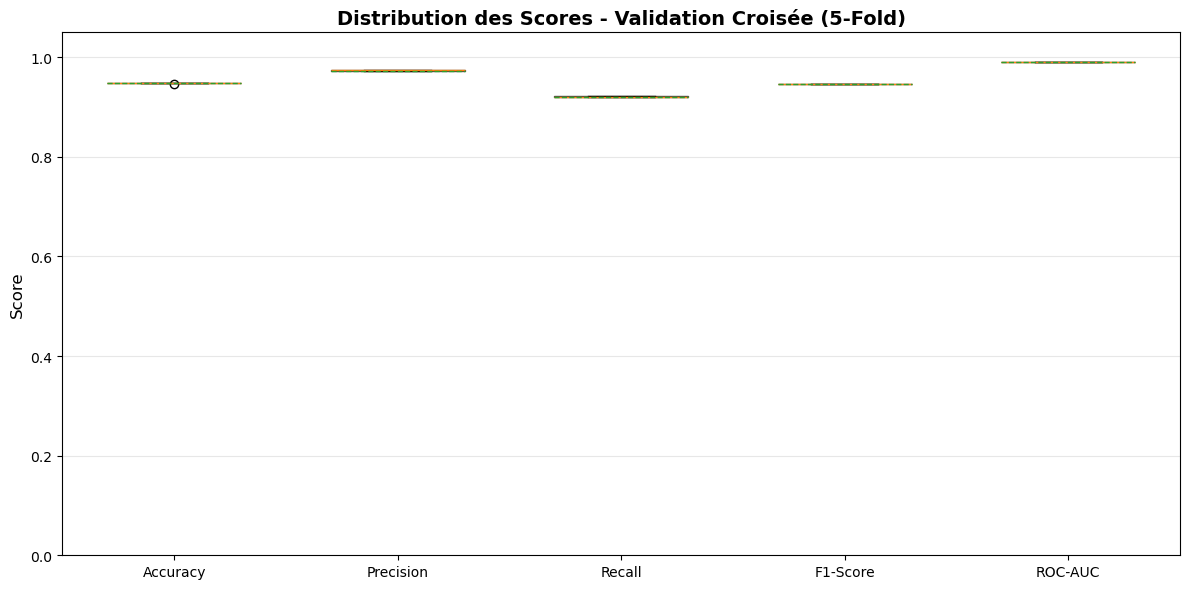

In [28]:
# EVALUATION 3: METHODE DE VALIDATION CROISEE

# Validation croisée avec 5 folds
cv_scores_accuracy = cross_val_score(model_LR, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(model_LR, X_train, y_train, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(model_LR, X_train, y_train, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(model_LR, X_train, y_train, cv=5, scoring='f1')
cv_scores_roc_auc = cross_val_score(model_LR, X_train, y_train, cv=5, scoring='roc_auc')

# Stocker les résultats de validation croisée
results['Logistic Regression']['cv_accuracy'] = cv_scores_accuracy.mean()
results['Logistic Regression']['cv_accuracy_std'] = cv_scores_accuracy.std()
results['Logistic Regression']['cv_precision'] = cv_scores_precision.mean()
results['Logistic Regression']['cv_recall'] = cv_scores_recall.mean()
results['Logistic Regression']['cv_f1'] = cv_scores_f1.mean()
results['Logistic Regression']['cv_roc_auc'] = cv_scores_roc_auc.mean()

print("\ Résultats de la Validation Croisée (5-Fold):")
print(f"\n   Accuracy:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_accuracy]}")
print(f"      Moyenne: {cv_scores_accuracy.mean():.4f} ± {cv_scores_accuracy.std():.4f}")

print(f"\n   Precision:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_precision]}")
print(f"      Moyenne: {cv_scores_precision.mean():.4f} ± {cv_scores_precision.std():.4f}")

print(f"\n   Recall:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_recall]}")
print(f"      Moyenne: {cv_scores_recall.mean():.4f} ± {cv_scores_recall.std():.4f}")

print(f"\n   F1-Score:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_f1]}")
print(f"      Moyenne: {cv_scores_f1.mean():.4f} ± {cv_scores_f1.std():.4f}")

print(f"\n   ROC-AUC:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_roc_auc]}")
print(f"      Moyenne: {cv_scores_roc_auc.mean():.4f} ± {cv_scores_roc_auc.std():.4f}")

# Visualisation des scores de validation croisée
fig, ax = plt.subplots(figsize=(12, 6))

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
cv_scores_list = [cv_scores_accuracy, cv_scores_precision, cv_scores_recall, 
                  cv_scores_f1, cv_scores_roc_auc]

positions = np.arange(len(metrics_names))
bp = ax.boxplot(cv_scores_list, positions=positions, widths=0.6, patch_artist=True,
                showmeans=True, meanline=True)

# Couleurs
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

ax.set_xticklabels(metrics_names)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Distribution des Scores - Validation Croisée (5-Fold)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, 1.05)
plt.tight_layout()
plt.show()

### Etape 5: Random forest 

## Modèle 

In [32]:
#Modele
start3 = time.time()
model_RF2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=50,
    min_samples_leaf=20,
    max_features='sqrt',
    class_weight='balanced', 
    random_state=42,
    n_jobs=-1,
    verbose=1
)
# Entrainement 
model_RF2.fit(X_train, y_train)
train_time3 = time.time() - start3
results['Random Forest'] = {
    'model': model_RF2,
    'train_time': train_time3
}
print(f" Terminé en {results['Random Forest']['train_time']:.2f}s")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   11.2s


 Terminé en 36.01s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.9s finished


In [33]:
#Prediction
y_pred_RF2 = model_RF2.predict(X_test)
y_proba_RF2 = model_RF2.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished


### Evalutation


Vrais Négatifs (TN)  : 56616 (Normal prédit Normal)
Faux Positifs (FP)   :    35 (Normal prédit Fraude)
Faux Négatifs (FN)   :    18 (Fraude prédit Normal)
Vrais Positifs (TP)  :    77 (Fraude prédit Fraude)


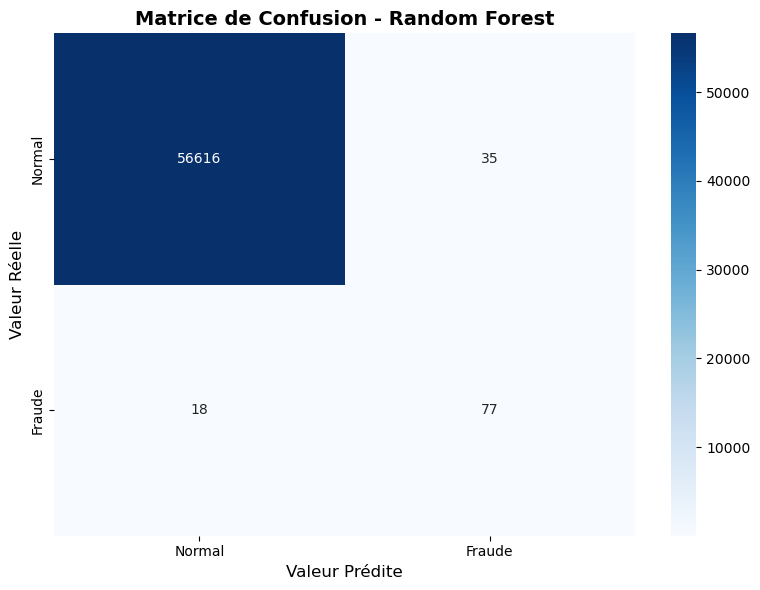


Métriques calculées à partir de la matrice:
   Accuracy  = (TP + TN) / Total    = 0.9991
   Precision = TP / (TP + FP)       = 0.9992
   Recall    = TP / (TP + FN)       = 0.9991
   F1-Score  = 2×(P×R)/(P+R)        = 0.9991


In [34]:
#ÉVALUATION 1 : MATRICE DE CONFUSION
cm = confusion_matrix(y_test, y_pred_RF2)

# Affichage des valeurs
print(f"\nVrais Négatifs (TN)  : {cm[0,0]:>5} (Normal prédit Normal)")
print(f"Faux Positifs (FP)   : {cm[0,1]:>5} (Normal prédit Fraude)")
print(f"Faux Négatifs (FN)   : {cm[1,0]:>5} (Fraude prédit Normal)")
print(f"Vrais Positifs (TP)  : {cm[1,1]:>5} (Fraude prédit Fraude)")

# Visualisation
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Normal', 'Fraude'],
            yticklabels=['Normal', 'Fraude'])
plt.title('Matrice de Confusion - Random Forest', fontsize=14, fontweight='bold') 
plt.ylabel('Valeur Réelle', fontsize=12)
plt.xlabel('Valeur Prédite', fontsize=12)
plt.tight_layout()
plt.show()

# Calcul des métriques dérivées et stockage
accuracy_3 = accuracy_score(y_test, y_pred_RF2)
precision_3 = precision_score(y_test, y_pred_RF2,average='weighted')
recall_3 = recall_score(y_test, y_pred_RF2,average='weighted')
f1_3 = f1_score(y_test, y_pred_RF2,average='weighted')

# Stocker les métriques dans le dictionnaire
results['Random Forest']['accuracy'] = accuracy_3
results['Random Forest']['precision'] = precision_3
results['Random Forest']['recall'] = recall_3
results['Random Forest']['f1'] = f1_3

print(f"\nMétriques calculées à partir de la matrice:")
print(f"   Accuracy  = (TP + TN) / Total    = {accuracy_3:.4f}")
print(f"   Precision = TP / (TP + FP)       = {precision_3:.4f}") 
print(f"   Recall    = TP / (TP + FN)       = {recall_3:.4f}")
print(f"   F1-Score  = 2×(P×R)/(P+R)        = {f1_3:.4f}")

 AUC-ROC Score: 0.9746


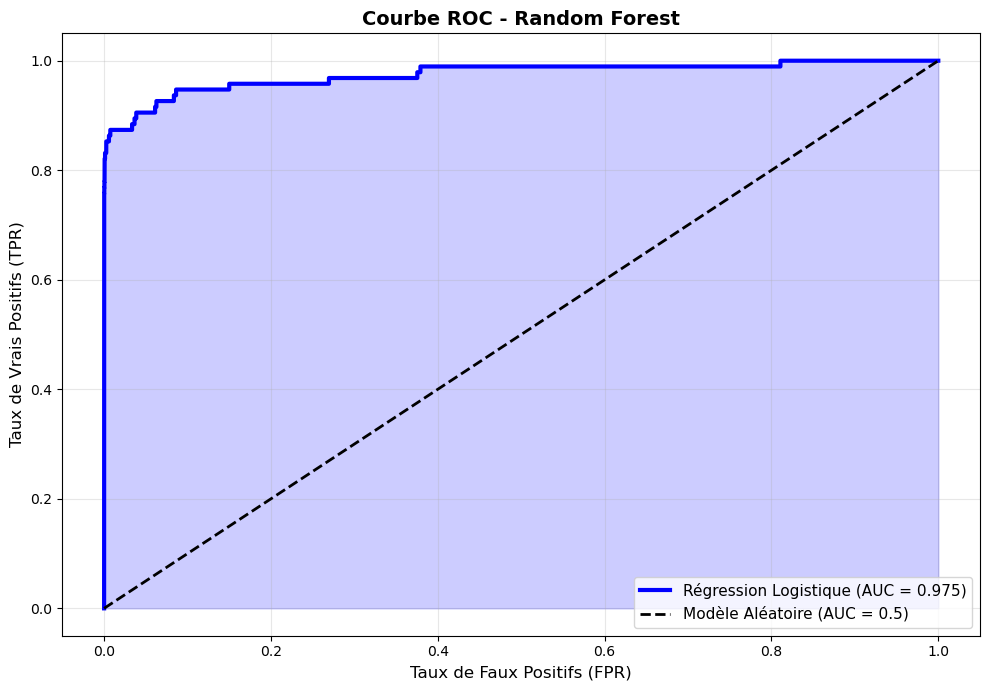

In [35]:
# ÉVALUATION 2 : AUC-ROC

# Calcul de l'AUC
auc_score_3= roc_auc_score(y_test,y_proba_RF2)

# Stocker l'AUC dans le dictionnaire
results['Random Forest']['auc'] = auc_score_3

print(f" AUC-ROC Score: {auc_score_3:.4f}")

# Interprétation
if auc_score_3 >= 0.9:
    interpretation = "Excellent modèle ! "
elif auc_score_3 >= 0.8:
    interpretation = "Très bon modèle "
elif auc_score_3 >= 0.7:
    interpretation = "Bon modèle "
elif auc_score_3 >= 0.6:
    interpretation = "Modèle acceptable "
else:
    interpretation = "Modèle faible "

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test,y_proba_RF2 )

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, linewidth=3, label=f'Régression Logistique (AUC = {auc_score_3:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Modèle Aléatoire (AUC = 0.5)')
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')

plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC - Random Forest', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.2s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    9

 Résultats de la Validation Croisée (5-Fold):

   Accuracy:
      Scores par fold: ['0.9992', '0.9990', '0.9991', '0.9991', '0.9991']
      Moyenne: 0.9991 ± 0.0001

   Precision:
      Scores par fold: ['0.9992', '0.9992', '0.9991', '0.9991', '0.9992']
      Moyenne: 0.9991 ± 0.0001

   Recall:
      Scores par fold: ['0.9993', '0.9989', '0.9991', '0.9991', '0.9991']
      Moyenne: 0.9991 ± 0.0001

   F1-Score:
      Scores par fold: ['0.9992', '0.9990', '0.9991', '0.9991', '0.9991']
      Moyenne: 0.9991 ± 0.0001

   ROC-AUC:
      Scores par fold: ['1.0000', '1.0000', '1.0000', '1.0000', '1.0000']
      Moyenne: 1.0000 ± 0.0000


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   32.8s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished


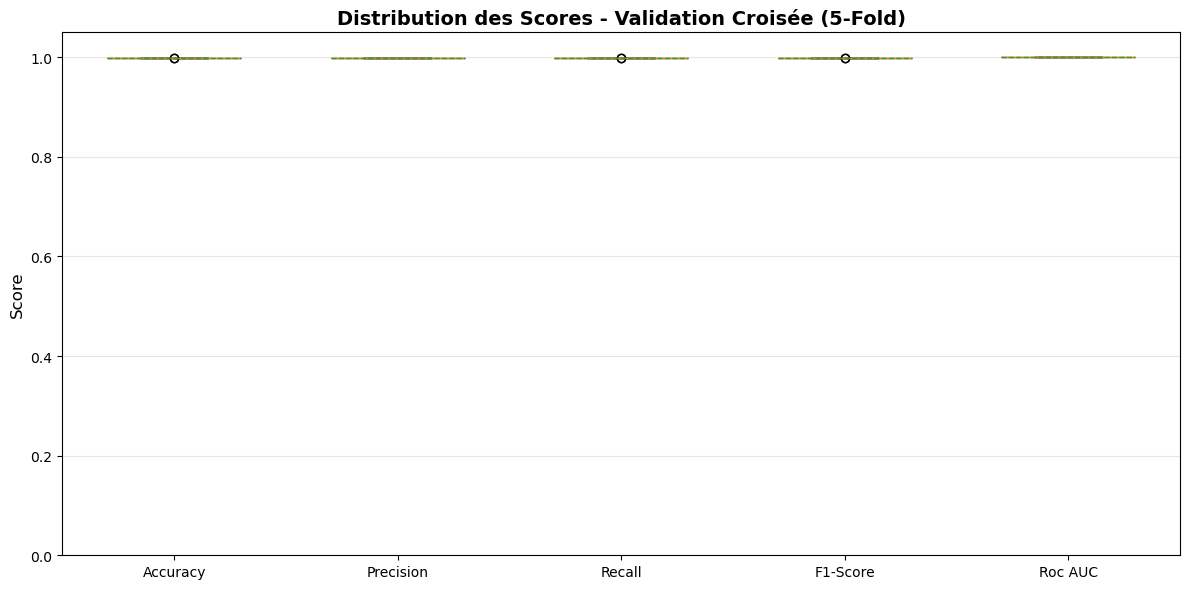

In [43]:
# EVALUATION 3: METHODE DE VALIDATION CROISEE

# Validation croisée avec 5 folds
cv_scores_accuracy_3= cross_val_score(model_RF2, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision_3= cross_val_score(model_RF2, X_train, y_train, cv=5, scoring='precision')
cv_scores_recall_3= cross_val_score(model_RF2, X_train, y_train, cv=5, scoring='recall')
cv_scores_f1_3=cross_val_score(model_RF2, X_train, y_train, cv=5, scoring='f1')
cv_scores_roc_auc_3 = cross_val_score(model_RF2, X_train, y_train, cv=5, scoring='roc_auc')

# Stocker les résultats de validation croisée
results['Random Forest']['cv_accuracy'] = cv_scores_accuracy_3.mean()
results['Random Forest']['cv_accuracy_std'] = cv_scores_accuracy_3.std()
results['Random Forest']['cv_precision'] = cv_scores_precision_3.mean()
results['Random Forest']['cv_recall'] = cv_scores_recall_3.mean()
results['Random Forest']['cv_f1'] = cv_scores_f1_3.mean()
results['Random Forest']['cv_roc_auc'] = cv_scores_roc_auc_3.mean()

print(" Résultats de la Validation Croisée (5-Fold):")
print(f"\n   Accuracy:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_accuracy_3]}")
print(f"      Moyenne: {cv_scores_accuracy_3.mean():.4f} ± {cv_scores_accuracy_3.std():.4f}")

print(f"\n   Precision:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_precision_3]}")
print(f"      Moyenne: {cv_scores_precision_3.mean():.4f} ± {cv_scores_precision_3.std():.4f}")

print(f"\n   Recall:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_recall_3]}")
print(f"      Moyenne: {cv_scores_recall_3.mean():.4f} ± {cv_scores_recall_3.std():.4f}")

print(f"\n   F1-Score:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_f1_3]}")
print(f"      Moyenne: {cv_scores_f1_3.mean():.4f} ± {cv_scores_f1_3.std():.4f}")

print(f"\n   ROC-AUC:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_roc_auc_3]}")
print(f"      Moyenne: {cv_scores_roc_auc_3.mean():.4f} ± {cv_scores_roc_auc_3.std():.4f}")


# Visualisation des scores de validation croisée
fig, ax = plt.subplots(figsize=(12, 6))

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score','Roc AUC']
cv_scores_list = [cv_scores_accuracy_3, cv_scores_precision_3, cv_scores_recall_3, 
                  cv_scores_f1_3,cv_scores_roc_auc_3]

positions = np.arange(len(metrics_names))
bp = ax.boxplot(cv_scores_list, positions=positions, widths=0.6, patch_artist=True,
                showmeans=True, meanline=True)

# Couleurs
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

ax.set_xticklabels(metrics_names)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Distribution des Scores - Validation Croisée (5-Fold)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, 1.05)
plt.tight_layout()
plt.show()

### Etape 6: XGBoost

### Modele

In [36]:
import xgboost as xgb

# Calculer le ratio pour scale_pos_weight
ratio = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Ratio non-fraude/fraude: {ratio:.2f}")

start = time.time()
model_XGB = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,                   
    learning_rate=0.1,              
    scale_pos_weight=ratio,         
    subsample=0.8,                 
    colsample_bytree=0.8,           
    gamma=1,                        
    min_child_weight=5,             
    reg_alpha=0.1,                  
    reg_lambda=1,                   
    random_state=42,
    n_jobs=-1,
    eval_metric='aucpr',            
    verbosity=1
)
# Entraînement
model_XGB.fit(X_train, y_train)
train_time_xgb = time.time() - start

results['XGBoost'] = {
    'model': model_XGB,
    'train_time':train_time_xgb 
}
print(f" Terminé en {results['XGBoost']['train_time']:.2f}s")

Ratio non-fraude/fraude: 1.00
 Terminé en 2.14s


In [37]:
# Prédictions
y_pred_xgb = model_XGB.predict(X_test)
y_proba_xgb = model_XGB.predict_proba(X_test)[:, 1]

### Evaluation


Vrais Négatifs (TN)  : 56605 (Normal prédit Normal)
Faux Positifs (FP)   :    46 (Normal prédit Fraude)
Faux Négatifs (FN)   :    19 (Fraude prédit Normal)
Vrais Positifs (TP)  :    76 (Fraude prédit Fraude)


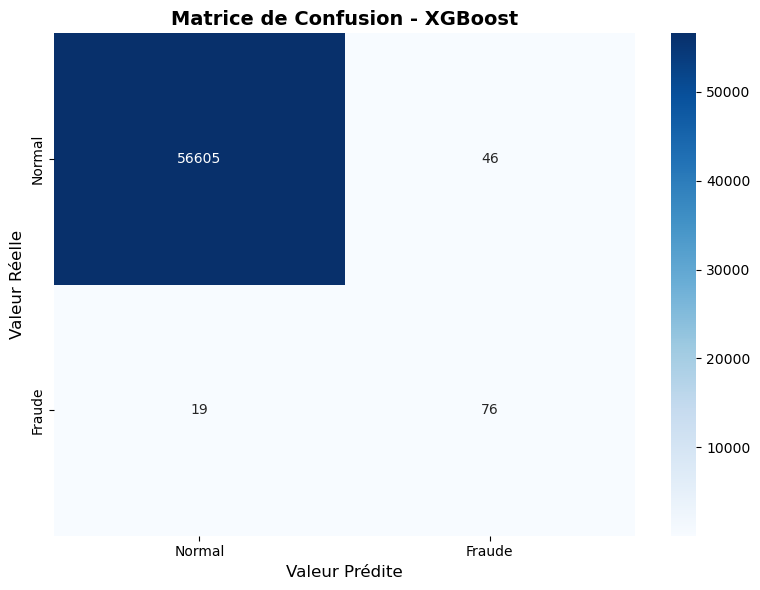


Métriques calculées à partir de la matrice:
   Accuracy  = (TP + TN) / Total    = 0.9989
   Precision = TP / (TP + FP)       = 0.9990
   Recall    = TP / (TP + FN)       = 0.9989
   F1-Score  = 2×(P×R)/(P+R)        = 0.9989


In [38]:
#ÉVALUATION 1 : MATRICE DE CONFUSION
cm = confusion_matrix(y_test,y_pred_xgb)

# Affichage des valeurs
print(f"\nVrais Négatifs (TN)  : {cm[0,0]:>5} (Normal prédit Normal)")
print(f"Faux Positifs (FP)   : {cm[0,1]:>5} (Normal prédit Fraude)")
print(f"Faux Négatifs (FN)   : {cm[1,0]:>5} (Fraude prédit Normal)")
print(f"Vrais Positifs (TP)  : {cm[1,1]:>5} (Fraude prédit Fraude)")

# Visualisation
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Normal', 'Fraude'],
            yticklabels=['Normal', 'Fraude'])
plt.title('Matrice de Confusion - XGBoost', fontsize=14, fontweight='bold') 
plt.ylabel('Valeur Réelle', fontsize=12)
plt.xlabel('Valeur Prédite', fontsize=12)
plt.tight_layout()
plt.show()

# Calcul des métriques dérivées et stockage
accuracy_4 = accuracy_score(y_test,y_pred_xgb)
precision_4 = precision_score(y_test,y_pred_xgb,average='weighted')
recall_4 = recall_score(y_test,y_pred_xgb,average='weighted')
f1_4 = f1_score(y_test,y_pred_xgb,average='weighted')

# Stocker les métriques dans le dictionnaire
results['XGBoost']['accuracy'] = accuracy_4
results['XGBoost']['precision'] = precision_4
results['XGBoost']['recall'] = recall_4
results['XGBoost']['f1'] = f1_4

print(f"\nMétriques calculées à partir de la matrice:")
print(f"   Accuracy  = (TP + TN) / Total    = {accuracy_4:.4f}")
print(f"   Precision = TP / (TP + FP)       = {precision_4:.4f}") 
print(f"   Recall    = TP / (TP + FN)       = {recall_4:.4f}")
print(f"   F1-Score  = 2×(P×R)/(P+R)        = {f1_4:.4f}")

 AUC-ROC Score: 0.8996


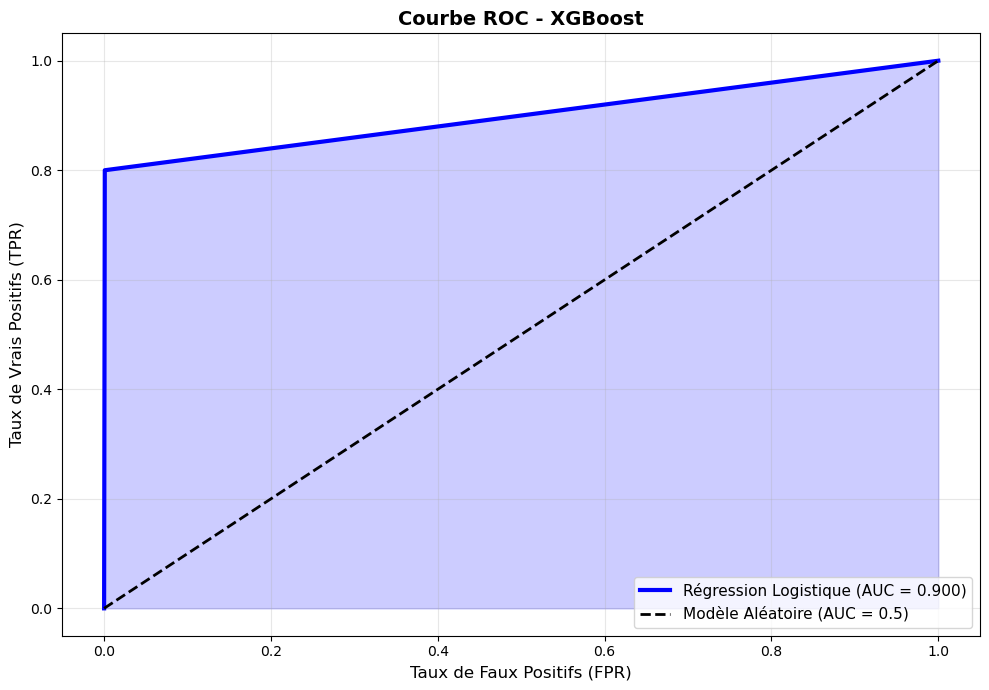

In [39]:
# ÉVALUATION 2 : AUC-ROC

# Calcul de l'AUC
auc_score_4= roc_auc_score(y_test,y_pred_xgb)

# Stocker l'AUC dans le dictionnaire
results['XGBoost']['auc'] = auc_score_4

print(f" AUC-ROC Score: {auc_score_4:.4f}")

# Interprétation
if auc_score_3 >= 0.9:
    interpretation = "Excellent modèle ! "
elif auc_score_3 >= 0.8:
    interpretation = "Très bon modèle "
elif auc_score_3 >= 0.7:
    interpretation = "Bon modèle "
elif auc_score_3 >= 0.6:
    interpretation = "Modèle acceptable "
else:
    interpretation = "Modèle faible "

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test,y_pred_xgb)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, linewidth=3, label=f'Régression Logistique (AUC = {auc_score_4:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Modèle Aléatoire (AUC = 0.5)')
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')

plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Courbe ROC - XGBoost', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

 Résultats de la Validation Croisée (5-Fold):

   Accuracy:
      Scores par fold: ['0.9997', '0.9995', '0.9996', '0.9996', '0.9996']
      Moyenne: 0.9996 ± 0.0001

   Precision:
      Scores par fold: ['0.9993', '0.9989', '0.9992', '0.9992', '0.9992']
      Moyenne: 0.9992 ± 0.0001

   Recall:
      Scores par fold: ['1.0000', '1.0000', '1.0000', '1.0000', '1.0000']
      Moyenne: 1.0000 ± 0.0000

   F1-Score:
      Scores par fold: ['0.9997', '0.9995', '0.9996', '0.9996', '0.9996']
      Moyenne: 0.9996 ± 0.0001

   ROC-AUC:
      Scores par fold: ['1.0000', '1.0000', '1.0000', '1.0000', '1.0000']
      Moyenne: 1.0000 ± 0.0000


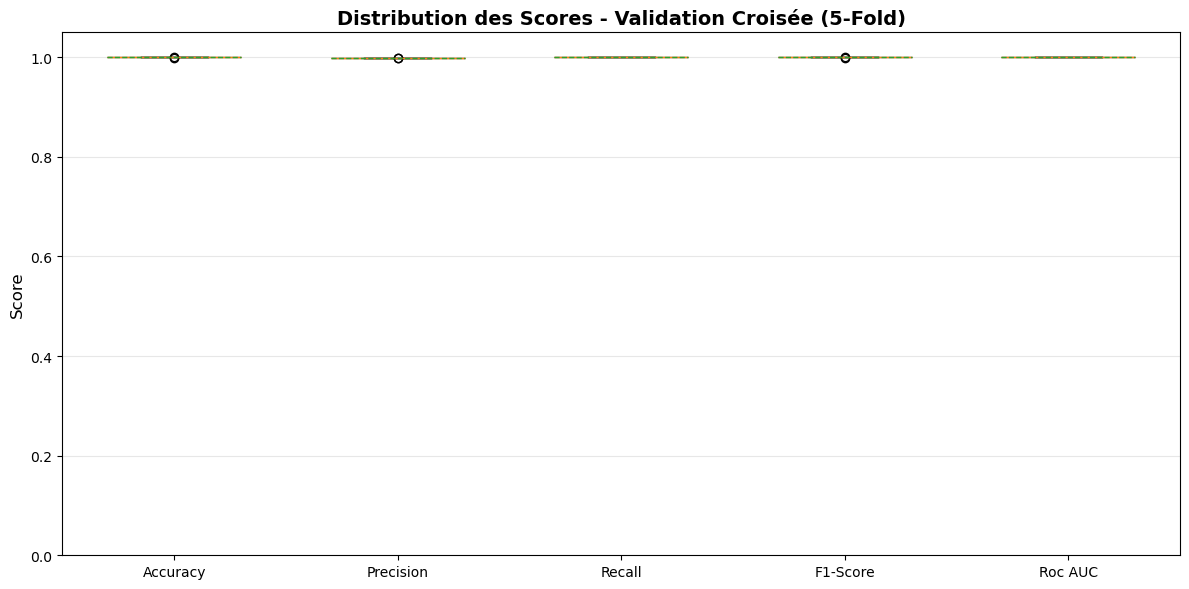

In [42]:
# EVALUATION 3: METHODE DE VALIDATION CROISEE

# Validation croisée avec 5 folds
cv_scores_accuracy_4= cross_val_score(model_XGB, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision_4= cross_val_score(model_XGB, X_train, y_train, cv=5, scoring='precision')
cv_scores_recall_4= cross_val_score(model_XGB, X_train, y_train, cv=5, scoring='recall')
cv_scores_f1_4=cross_val_score(model_XGB, X_train, y_train, cv=5, scoring='f1')
cv_scores_roc_auc_4 = cross_val_score(model_XGB, X_train, y_train, cv=5, scoring='roc_auc')

# Stocker les résultats de validation croisée
results['XGBoost']['cv_accuracy'] = cv_scores_accuracy_4.mean()
results['XGBoost']['cv_accuracy_std'] = cv_scores_accuracy_4.std()
results['XGBoost']['cv_precision'] = cv_scores_precision_4.mean()
results['XGBoost']['cv_recall'] = cv_scores_recall_4.mean()
results['XGBoost']['cv_f1'] = cv_scores_f1_4.mean()
results['XGBoost']['cv_roc_auc'] = cv_scores_roc_auc_4.mean()

print(" Résultats de la Validation Croisée (5-Fold):")
print(f"\n   Accuracy:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_accuracy_4]}")
print(f"      Moyenne: {cv_scores_accuracy_4.mean():.4f} ± {cv_scores_accuracy_4.std():.4f}")

print(f"\n   Precision:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_precision_4]}")
print(f"      Moyenne: {cv_scores_precision_4.mean():.4f} ± {cv_scores_precision_4.std():.4f}")

print(f"\n   Recall:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_recall_4]}")
print(f"      Moyenne: {cv_scores_recall_4.mean():.4f} ± {cv_scores_recall_4.std():.4f}")

print(f"\n   F1-Score:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_f1_4]}")
print(f"      Moyenne: {cv_scores_f1_4.mean():.4f} ± {cv_scores_f1_4.std():.4f}")

print(f"\n   ROC-AUC:")
print(f"      Scores par fold: {[f'{s:.4f}' for s in cv_scores_roc_auc_4]}")
print(f"      Moyenne: {cv_scores_roc_auc_4.mean():.4f} ± {cv_scores_roc_auc_4.std():.4f}")


# Visualisation des scores de validation croisée
fig, ax = plt.subplots(figsize=(12, 6))

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score','Roc AUC']
cv_scores_list = [cv_scores_accuracy_4, cv_scores_precision_4, cv_scores_recall_4, 
                  cv_scores_f1_4,cv_scores_roc_auc_4]

positions = np.arange(len(metrics_names))
bp = ax.boxplot(cv_scores_list, positions=positions, widths=0.6, patch_artist=True,
                showmeans=True, meanline=True)

# Couleurs
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

ax.set_xticklabels(metrics_names)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Distribution des Scores - Validation Croisée (5-Fold)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, 1.05)
plt.tight_layout()
plt.show()